# **Sales Forecasting and Optimization Project**
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title> </title>
    <style>
        body {
            font-family: Arial, sans-serif;
            line-height: 1.6;
            background-color: #f4f4f4;
            color: #333;
            padding: 20px;
        }
        .container {
            max-width: 900px;
            margin: auto;
            background: white;
            padding: 20px;
            border-radius: 10px;
            box-shadow: 0 0 10px rgba(0, 0, 0, 0.1);
        }
        h1, h2, h3 {
            color: #2c3e50;
        }
        ul {
            list-style: none;
            padding: 0;
        }
        ul li::before {
            content: "\1F4CC";
            margin-right: 8px;
        }
        .section {
            margin-bottom: 20px;
            padding: 15px;
            background: #ecf0f1;
            border-left: 5px solid #2980b9;
            border-radius: 5px;
        }
    </style>
</head>
<body>
    <div class="container">
        <h1>🔍 Dataset Overview</h1>
        <div class="section">
            <ul>
                <li>🆔 <strong>Row ID:</strong> Unique identifier for each entry.</li>
                <li>📦 <strong>Order ID:</strong> Unique order identifier.</li>
                <li>📅 <strong>Order Date:</strong> Date when the order was placed.</li>
                <li>🚚 <strong>Ship Date:</strong> Date when the order was shipped.</li>
                <li>📦 <strong>Ship Mode:</strong> Shipping method used.</li>
                <li>👤 <strong>Customer ID:</strong> Unique identifier for each customer.</li>
                <li>🏷 <strong>Customer Name:</strong> Name of the customer.</li>
                <li>🎯 <strong>Segment:</strong> Market segment (e.g., Consumer, Corporate).</li>
                <li>🌎 <strong>Country:</strong> Country where the order was placed.</li>
                <li>🏙 <strong>City:</strong> City where the order was placed.</li>
                <li>🏛 <strong>State:</strong> State where the order was placed.</li>
                <li>📮 <strong>Postal Code:</strong> Postal code of the customer.</li>
                <li>🌍 <strong>Region:</strong> Geographic region.</li>
                <li>🔢 <strong>Product ID:</strong> Unique identifier for the product.</li>
                <li>🛍 <strong>Category:</strong> Category of the product (e.g., Furniture, Office Supplies).</li>
                <li>🗂 <strong>Sub-Category:</strong> Sub-category of the product.</li>
                <li>🏷 <strong>Product Name:</strong> Name of the product.</li>
                <li>💰 <strong>Sales:</strong> Total sales amount.</li>
                <li>📦 <strong>Quantity:</strong> Quantity of items purchased.</li>
                <li>🎟 <strong>Discount:</strong> Discount applied.</li>
                <li>💸 <strong>Profit:</strong> Profit generated from the sale.</li>
            </ul>
        </div>
    </div>
</body>
</html>

- The Sales Forecasting and Optimization project aims to predict future sales for a retail or e-commerce
business.




## Importing libraries

In [5]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations

# **Data Cleaning and Preprocessing**

## Loading Dataset from Google Drive


In [6]:
df=pd.read_csv('stores_sales_forecasting.csv',encoding='latin1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


# Exploring the Dataset
## Provides an overview of data types and missing values




In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

## Summary Statistics of the Dataset

In [ ]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000
mean,5041.643564,55726.556341,349.834887,3.785007,0.173923,8.699327
std,2885.740258,32261.888225,503.179145,2.251620,0.181547,136.049246
min,1.000000,1040.000000,1.892000,1.000000,0.000000,-1862.312400
25%,2568.000000,22801.000000,47.040000,2.000000,0.000000,-12.849000
50%,5145.000000,60505.000000,182.220000,3.000000,0.200000,7.774800
75%,7534.000000,90032.000000,435.168000,5.000000,0.300000,33.726600
max,9991.000000,99301.000000,4416.174000,14.000000,0.700000,1013.127000


## Checking for Missing Values


In [ ]:
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


## Handling Duplicate Data


In [ ]:
# Count the number of duplicate rows in the dataset
df.duplicated().sum()
# Remove duplicate rows from the dataset in place
df.drop_duplicates(inplace=True)

## Checking Unique Values in Each Column


In [ ]:
df.nunique()

,0
Row ID,2121
Order ID,1764
Order Date,889
Ship Date,960
Ship Mode,4
Customer ID,707
Customer Name,707
Segment,3
Country,1
City,371


## Removing Constant Columns

In [ ]:
# Drop columns that have only one unique value
df.drop(columns=df.nunique()[df.nunique() == 1].index, inplace=True)
# Display the updated DataFrame
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,Region,Product ID,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-BO-10001798,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-CH-10000454,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,Los Angeles,California,90032,West,FUR-FU-10001487,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,Los Angeles,California,90032,West,FUR-TA-10001539,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


 ## Converting and Indexing Date Column
 ### Convert Ship Date to datetime format
 ### Set Ship Date as index

In [ ]:
# Convert the 'Ship Date' column to datetime format
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
# Set 'Ship Date' as the index of the DataFrame
df.set_index('Ship Date', inplace=True)

## Dropping Unnecessary Columns

# **Exploratory Data Analysis (EDA)**

## Visualizing Data Distribution by Segment


In [ ]:
columns_to_drop=['Row ID', 'Order ID','Customer ID', 'Product ID','Postal Code','Customer Name']
df.drop(columns=columns_to_drop, inplace=True)
df

,Order Date,Ship Mode,Segment,City,State,Region,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Ship Date,,,,,,,,,,,,
2016-11-11,11/8/2016,Second Class,Consumer,Henderson,Kentucky,South,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2016-11-11,11/8/2016,Second Class,Consumer,Henderson,Kentucky,South,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2015-10-18,10/11/2015,Standard Class,Consumer,Fort Lauderdale,Florida,South,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
2014-06-14,6/9/2014,Standard Class,Consumer,Los Angeles,California,West,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
2014-06-14,6/9/2014,Standard Class,Consumer,Los Angeles,California,West,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092
...,...,...,...,...,...,...,...,...,...,...,...,...
2015-03-22,3/19/2015,First Class,Home Office,Houston,Texas,Central,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.4656,4,0.32,-67.6704
2016-12-10,12/5/2016,Second Class,Corporate,Newark,Delaware,East,Furnishings,Electrix 20W Halogen Replacement Bulb for Zoom...,13.4000,1,0.00,6.4320
2015-09-09,9/6/2015,Second Class,Consumer,Lafayette,Louisiana,South,Tables,KI Adjustable-Height Table,85.9800,1,0.00,22.3548


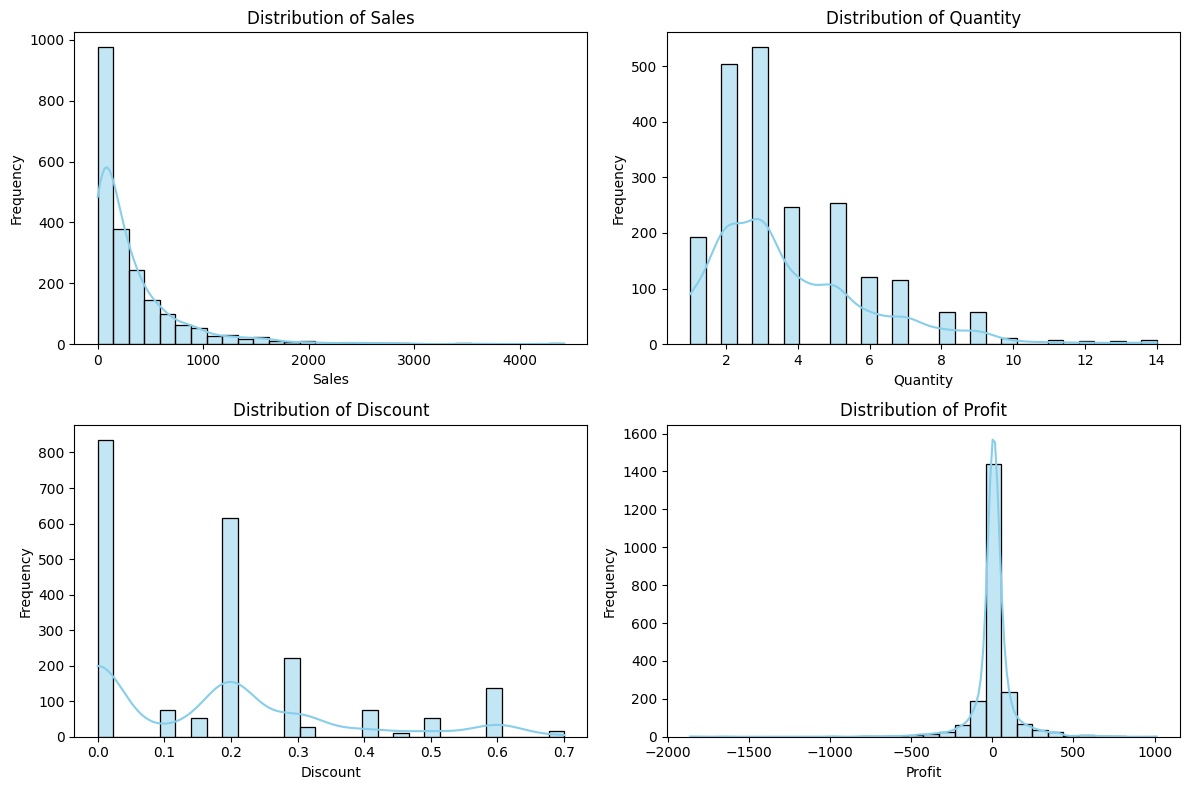

In [ ]:
num_features = ['Sales', 'Quantity', 'Discount', 'Profit']

# Set up the plotting area
plt.figure(figsize=(12, 8))

# Plot histograms for each numerical feature
for i, feature in enumerate(num_features):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[feature], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# **Correlation Analysis**

## Heatmap of Key Metrics Correlation

The following heatmap visualizes the correlation between four key business metrics: **Sales, Quantity, Discount, and Profit**. Correlation measures the strength and direction of relationships between these variables, helping us understand potential dependencies.


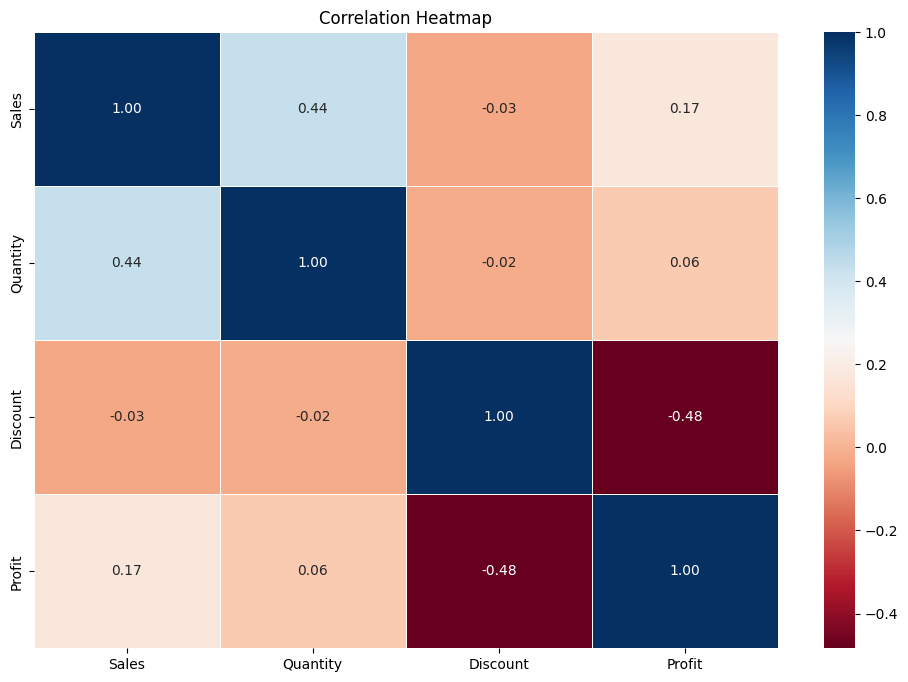

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='RdBu', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


**Insights**  

1. **Sales vs. Profit (0.17)** → Weak positive correlation; sales slightly impact profit but are not the main driver due to factors like costs and discounts.  

2. **Sales vs. Quantity (0.44)** → Weak to moderate positive correlation; higher sales are somewhat linked to selling more units, but pricing strategies also matter.  

3. **Discount vs. Profit (-0.48)** → Weak to moderate negative correlation; higher discounts reduce profit, suggesting a need to reassess discount strategies.  

4. **Discount vs. Sales (-0.029)** → Negligible correlation; discounts have little effect on boosting sales, indicating other factors influence purchasing behavior.  

5. **Quantity vs. Profit (0.061)** → Very weak positive correlation; selling more units does not significantly improve profit, likely due to cost and discounting structures.

## Outlier Detection Using IQR Method





In [ ]:
numerical_features = ['Sales', 'Quantity', 'Discount', 'Profit']

# Detect outliers using IQR for each numerical feature
for feature in numerical_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1

    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter outliers
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]

    print(f'Feature: {feature}')
    print(f'Number of Outliers: {outliers.shape[0]}')
    print(outliers[[feature]])



Feature: Sales
Number of Outliers: 164
               Sales
Ship Date           
2014-06-14  1706.184
2015-09-30  1044.630
2015-09-21  3083.430
2016-12-09  1951.840
2014-09-12  1740.060
...              ...
2015-11-12  4404.900
2016-11-05  1403.920
2017-04-01  1023.332
2015-03-30  3393.680
2017-06-03  1925.880

[164 rows x 1 columns]
Feature: Quantity
Number of Outliers: 39
            Quantity
Ship Date           
2016-10-19        14
2017-12-12        13
2014-05-27        10
2017-10-06        11
2017-12-02        12
2015-12-24        13
2017-10-16        14
2014-12-14        12
2014-12-21        14
2017-10-18        13
2017-10-29        11
2015-09-28        10
2017-05-21        12
2014-10-16        11
2017-01-05        11
2015-11-30        11
2016-06-03        10
2017-12-09        10
2016-09-30        11
2015-01-09        14
2015-11-05        10
2017-09-26        11
2014-12-31        14
2014-03-21        10
2014-11-22        10
2015-12-04        12
2016-09-18        14
2016-11-06    

## Exploratory Data Analysis: Distribution of Numeric Features

## Boxplot Analysis of Numeric Features
## Overview
This visualization provides box plots for four key numerical features: **Sales, Quantity, Discount, and Profit**. Box plots help in understanding the distribution of data, detecting outliers, and identifying trends in each variable.



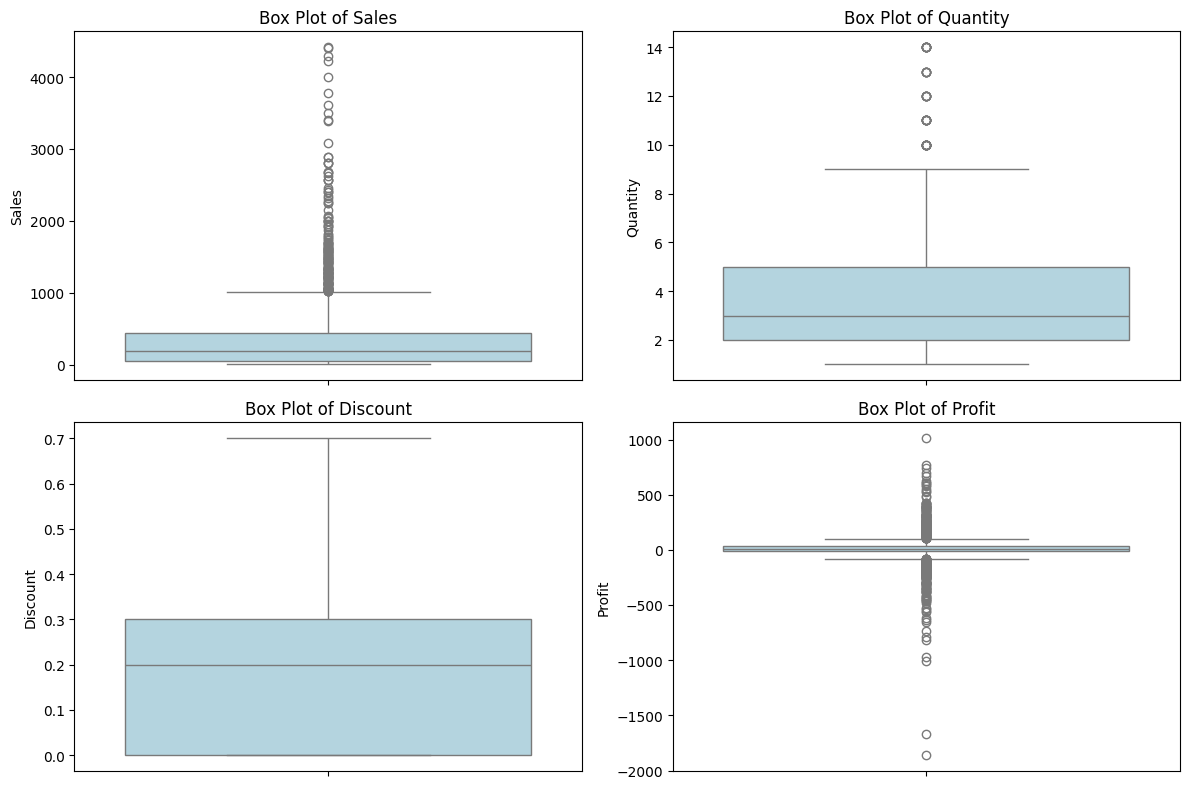

In [ ]:
# List of numerical features
num_features = ['Sales', 'Quantity', 'Discount', 'Profit']

# Set up the plotting area
plt.figure(figsize=(12, 8))

# Plot simple box plots for each numerical feature
for i, feature in enumerate(num_features):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(y=df[feature], color='lightblue')
    plt.title(f'Box Plot of {feature}')

plt.tight_layout()
plt.show()

 **Insights**

  - The Sales and Profit distributions exhibit a high number of outliers, suggesting that a small number of transactions contribute significantly to total sales and profits.
  - The Discount distribution appears more controlled, with no extreme variations.
  - The Quantity distribution is more balanced, though some large orders stand out.

## Outliers winsorization

In [ ]:
from scipy.stats.mstats import winsorize

for feature in num_features:
    df[feature] = winsorize(df[feature], limits=[0.05, 0.05])  # Cap 5% on both sides
    print(f"Outliers capped for {feature}")

Outliers capped for Sales
Outliers capped for Quantity
Outliers capped for Discount
Outliers capped for Profit


**Insights**
  - This preprocessing step ensures a more robust and stable dataset for further analysis and modeling.
  - Helps in improving model performance by preventing outliers from dominating results.

## Box Plot Analysis After Winsorization

## Overview
This visualization presents **box plots** for the numerical features **(Sales, Quantity, Discount, and Profit)** after applying **Winsorization** to cap extreme outliers. The goal is to observe how the distribution has changed and whether extreme values have been mitigated.

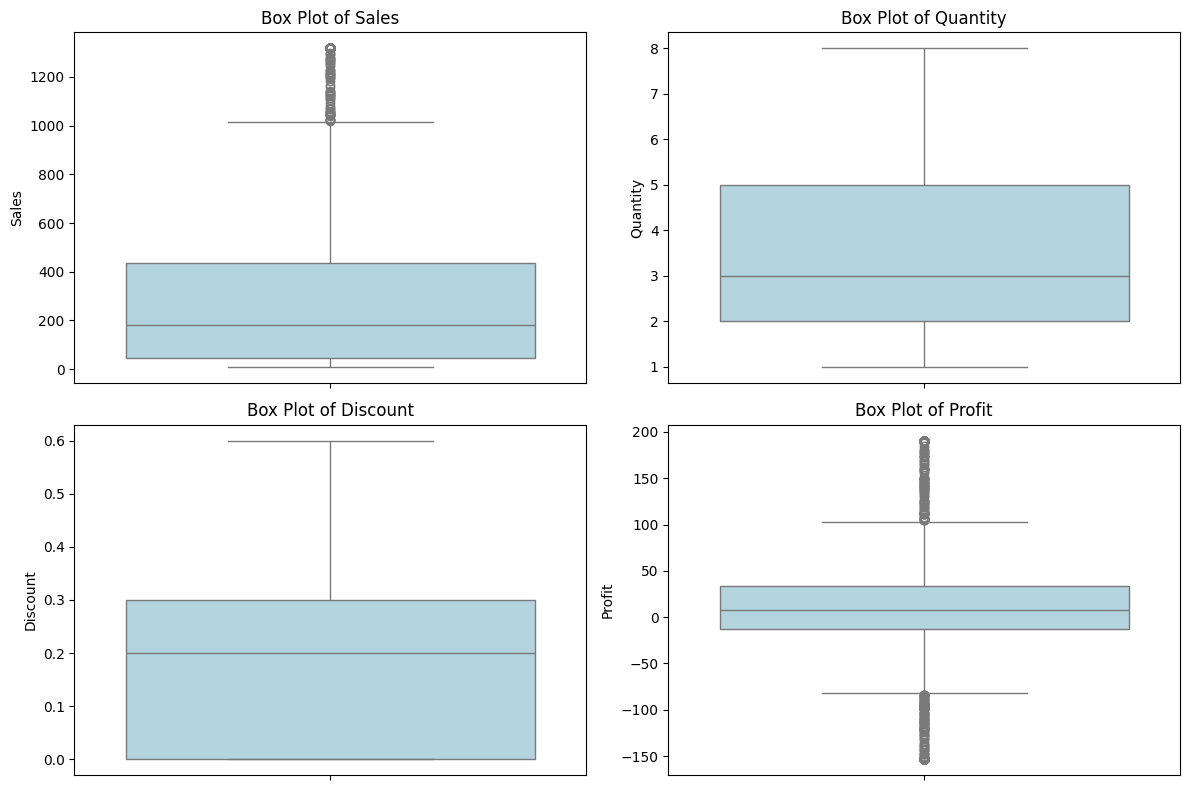

In [ ]:
# List of numerical features
num_features = ['Sales', 'Quantity', 'Discount', 'Profit']

# Set up the plotting area
plt.figure(figsize=(12, 8))

# Plot simple box plots for each numerical feature
for i, feature in enumerate(num_features):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(y=df[feature], color='lightblue')
    plt.title(f'Box Plot of {feature}')

plt.tight_layout()
plt.show()

**Insights from the Boxplots**  

1. **Sales Boxplot**  
   - Highly **skewed with numerous outliers**, indicating the presence of extreme high-value sales transactions.  
   - Most sales values are concentrated in a lower range, suggesting that high sales amounts are rare but significantly higher when they occur.  

2. **Quantity Boxplot**  
   - The distribution is **relatively balanced**, but there are **outliers** representing large-quantity purchases.  
   - Majority of transactions involve small quantities, which aligns with typical retail trends.  

3. **Discount Boxplot**  
   - Discounts are applied in a structured manner, as seen by the discrete distribution.  
   - The presence of **higher discounts in certain cases** may explain the negative correlation with profit observed earlier.  

4. **Profit Boxplot**  
   - High **variance** with **many outliers on both positive and negative ends**, indicating that some transactions lead to **significant losses** while others generate large profits.  
   - The presence of extreme **negative profit values** suggests that some sales are unprofitable, possibly due to excessive discounts or cost structure issues.  

# **Exploratory Data Analysis (EDA) on Categorical Features**


This analysis focuses on exploring the distribution of categorical features in the dataset. We visualize the counts of different categories to gain insights into the dataset composition.

**Categorical Features Analyzed**

  - Ship Mode: Different modes of shipment available.
  - Segment: Customer segments such as Consumer, Corporate, and Home Office.
  - Region: Geographical regions where sales occur.
  - Sub-Category: Various product sub-categories available in the dataset.



Ship Mode
Standard Class    1248
Second Class       427
First Class        327
Same Day           119
Name: count, dtype: int64


<ipython-input-25-5809af18d860>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=database, palette='deep')  # Corrected 'palette'


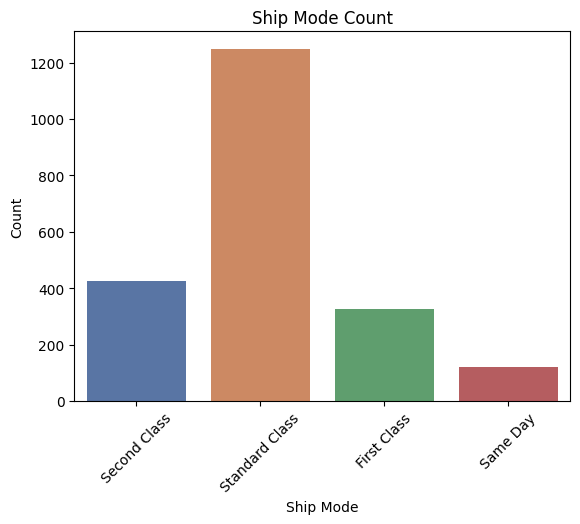

Segment
Consumer       1113
Corporate       646
Home Office     362
Name: count, dtype: int64


<ipython-input-25-5809af18d860>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=database, palette='deep')  # Corrected 'palette'


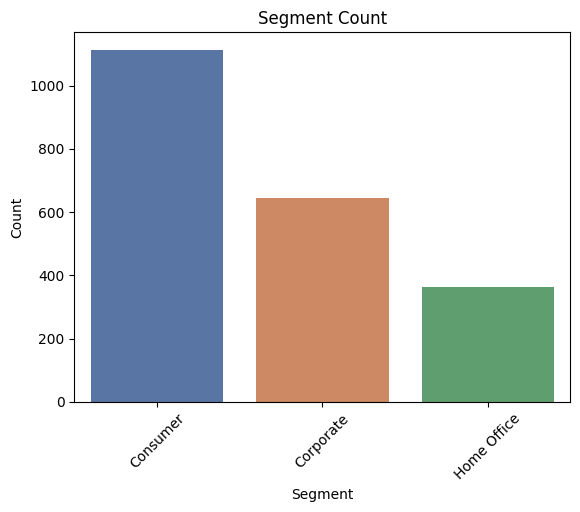

Region
West       707
East       601
Central    481
South      332
Name: count, dtype: int64


<ipython-input-25-5809af18d860>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=database, palette='deep')  # Corrected 'palette'


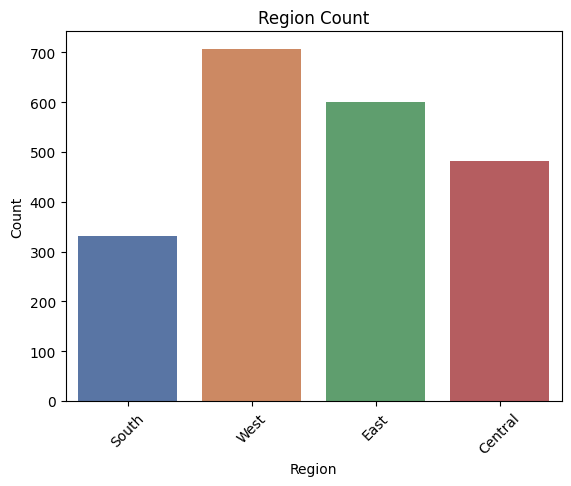

Sub-Category
Furnishings    957
Chairs         617
Tables         319
Bookcases      228
Name: count, dtype: int64


<ipython-input-25-5809af18d860>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=database, palette='deep')  # Corrected 'palette'


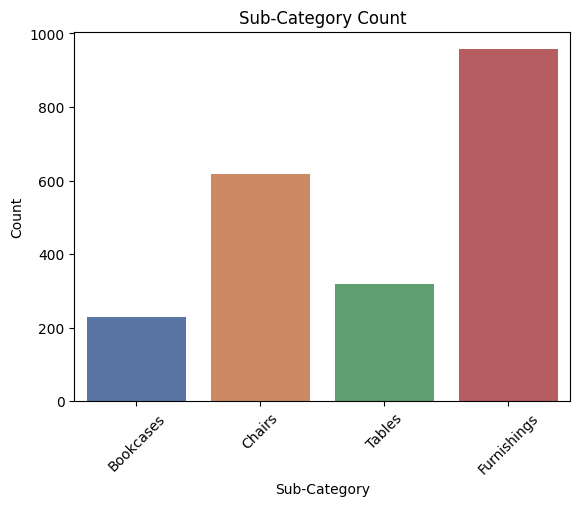

In [ ]:
# Categorical features
categorical_features = ['Ship Mode', 'Segment', 'Region', 'Sub-Category']

for feature in categorical_features:
    print(df[feature].value_counts())
    sns.countplot(x=feature, data=df, palette='deep')  # Corrected 'palette'
    plt.title(f'{feature} Count')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

**Ship Mode Count**

  - "Standard Class" is the most frequently used shipping method.
  - "Same Day" shipping has the lowest count.

**Segment Count**

  - The "Consumer" segment is the most dominant in the dataset.
  - " Home Office" has the least number of orders.

Region Count

  - The "West" region has the highest number of transactions.
  - The "South" region has the lowest count.

Sub-Category Count

  - "Furnishings" has the highest number of sales.
  - "Bookcases" has the lowest number of sales.

## Visualizing Region Distribution

This visualization provides insights into the distribution of sales across different regions. Understanding the sales volume per region helps in identifying key markets and potential areas for expansion.

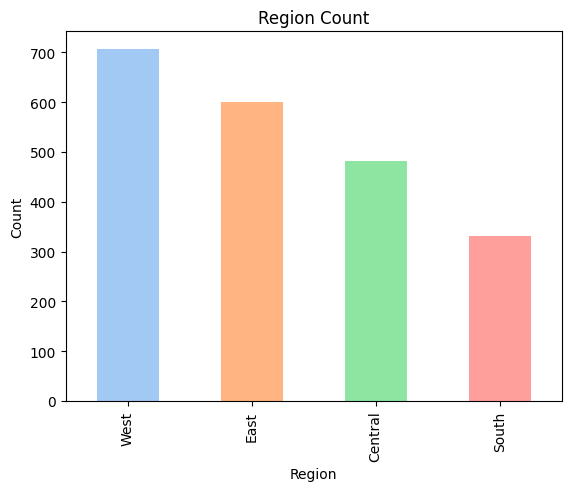

In [ ]:
colors = sns.color_palette('pastel')

# Plot the bar chart with custom colors
df.Region.value_counts().plot(kind="bar", color=colors)

# Add titles and labels for clarity (optional)
plt.title("Region Count")
plt.xlabel("Region")
plt.ylabel("Count")

# Display the plot
plt.show()

**Analysis & Observations**

  - The West region has the highest number of transactions.
  - The East and Central regions follow with moderate sales numbers.
  - The South region has the lowest transaction count, indicating a smaller customer base or market penetration.

## Visualizing Sub-Category Distribution with a Pie Chart

**This analysis explores the distribution of categorical features in our dataset. The features analyzed include**:

  - Ship Mode
  - Segment
  - Region
  - Sub-Category



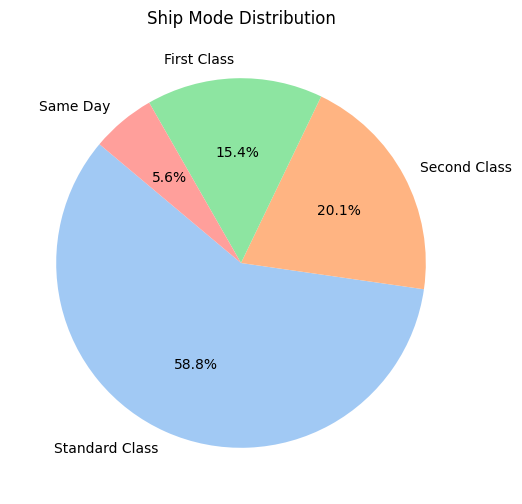

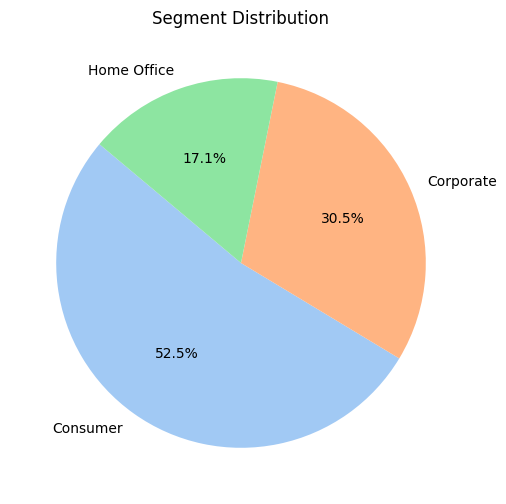

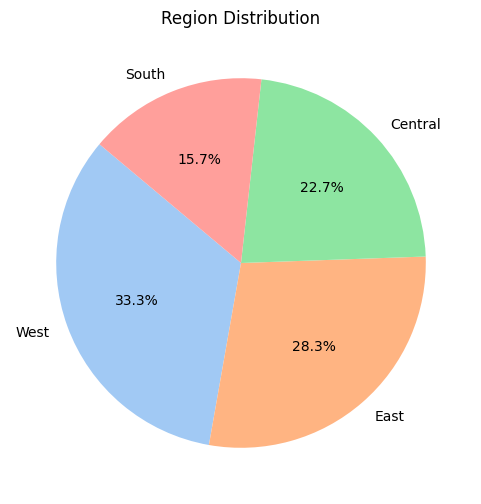

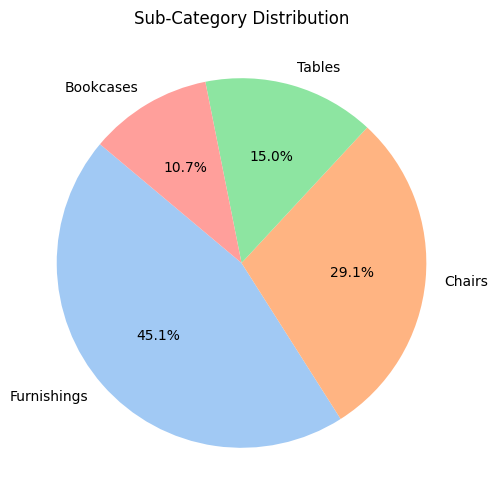

In [ ]:
# Categorical features
categorical_features = ['Ship Mode', 'Segment', 'Region', 'Sub-Category']

for feature in categorical_features:
    # Get value counts
    counts = df[feature].value_counts()

    # Plot pie chart
    plt.figure(figsize=(6, 6))
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
    plt.title(f'{feature} Distribution')

    plt.show()

**Visual Insights**
  - Ship Mode Distribution: The majority of shipments are through Standard Class, followed by Second Class, First Class, and Same Day shipping.
  - Segment Distribution: Consumers make up the largest segment, followed by Corporate clients and Home Office users.
  - Region Distribution: The dataset is divided into four regions, with the West having the highest representation and South being the lowest.
  - Sub-Category Distribution: Among different product sub-categories, Furnishings dominate, followed by Chairs, Tables, and Bookcases.

## Sales Data Distribution

This visualization represents the distribution of the **Sales** variable in the dataset. Understanding the distribution helps in identifying trends, skewness, and potential outliers in the data.

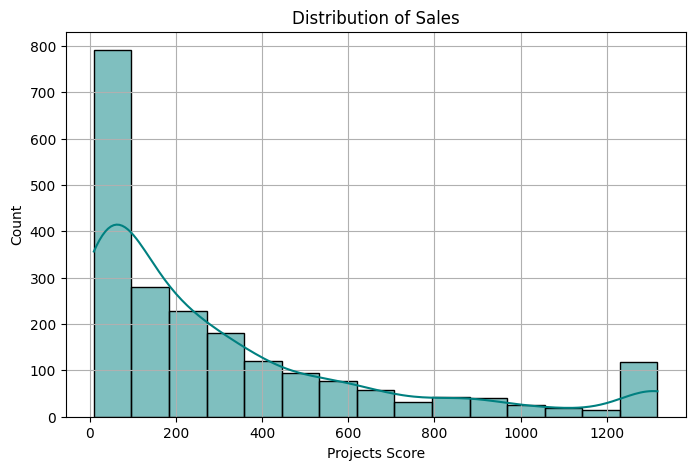

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Sales'], bins=15, kde=True, color='teal')
plt.title('Distribution of Sales')
plt.xlabel('Projects Score')
plt.ylabel('Count')
plt.grid(True)
plt.show()


**Insights**

  - The sales distribution is right-skewed, meaning most sales are on the lower end while a few higher values exist.

  - The highest frequency is observed in the lower sales range.

## Region vs. Segment Distribution


This bar chart illustrates the distribution of customer segments across different regions. Analyzing this data can provide insights into customer demographics and market reach across different locations.

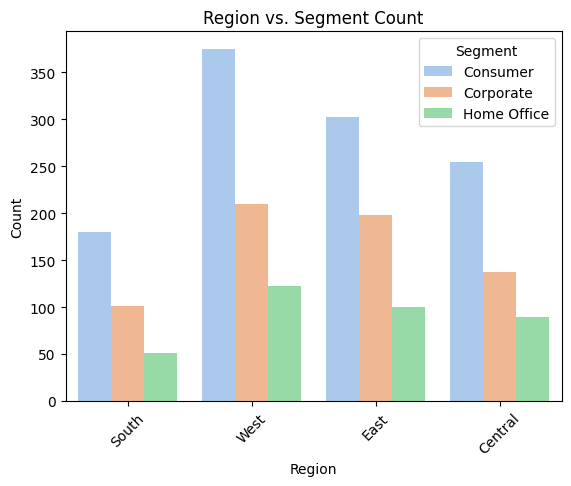

In [ ]:
sns.countplot(x='Region', hue='Segment', data=df, palette='pastel')
plt.title("Region vs. Segment Count")
plt.xlabel("Region")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


**Insight**s

  - The Consumer segment is the largest across all regions, particularly in the West.
  - The Corporate segment follows in second place, with relatively high representation in the West and East.
  - The Home Office segment has the lowest count but maintains a presence across all regions.
  - The West region has the highest number of customers across all segments, while South has the least.

## Pairplot Analysis of Sales Data by Region

The pairplot visualizes relationships between multiple numerical variables in the dataset while categorizing the data by **Region**. This helps identify trends, correlations, and potential patterns among key business metrics like **Sales, Quantity, Discount, and Profit.**

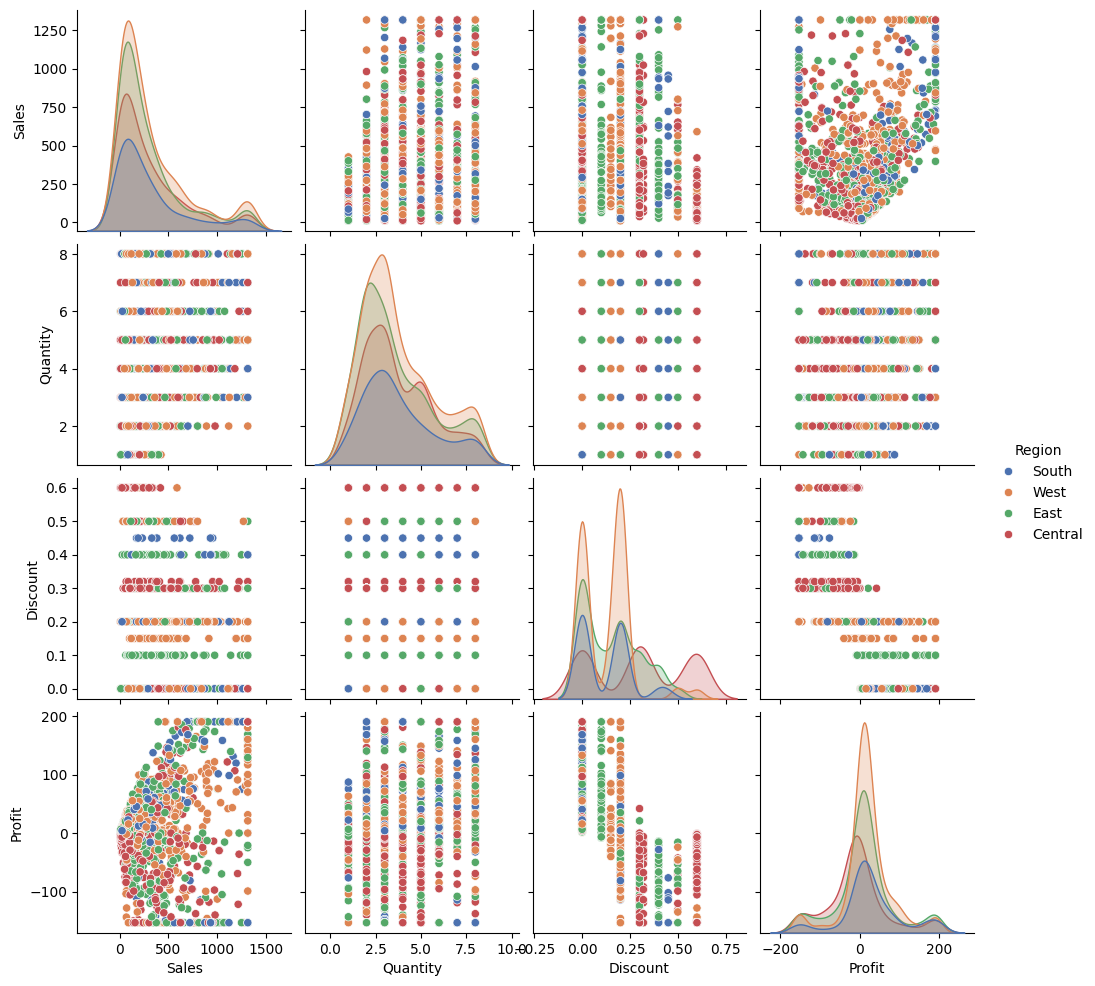

In [ ]:
sns.pairplot(df, hue='Region', palette='deep', diag_kind='kde')
plt.show()


**Insights**

  - Sales & Profit Relationship: There is a non-linear relationship between Sales and Profit, with some instances of negative profits despite high sales.
  - Discount Impact: Discount values seem to have distinct clusters, possibly affecting sales and profitability differently across regions.
  - Quantity Distribution: The quantity sold shows a stepwise distribution, suggesting discrete order sizes rather than continuous variation.
  - Region-Based Trends: Different regions show slight variations in sales, profit, and discount distributions.

## Profit Distribution Across Segments

The violin plot visualizes the distribution of profit across different business segments **(Consumer, Corporate, and Home Office**). It combines aspects of a box plot and a density plot to provide insights into the spread and concentration of profit values.

<ipython-input-31-511aa17a05e2>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Segment', y='Profit', data=database, palette='dark')


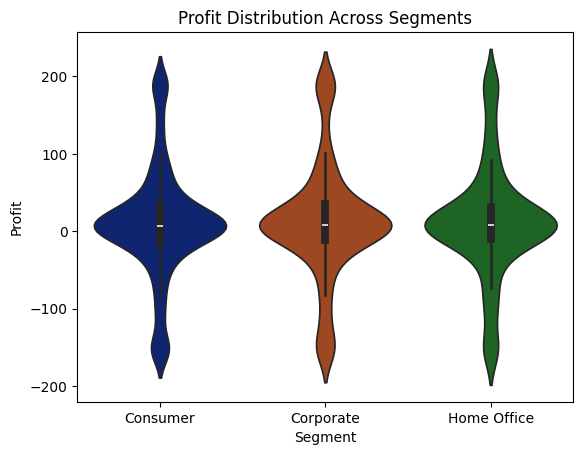

In [ ]:
sns.violinplot(x='Segment', y='Profit', data=df, palette='dark')
plt.title("Profit Distribution Across Segments")
plt.show()

**Insights**

  - Profit Variation: All segments exhibit a wide range of profit values, with some instances of negative profits.
  - Density Concentration: The widest parts of each violin indicate the most common profit values for each segment.
  - Outliers & Extreme Values: There are long tails at both ends, suggesting the presence of high profits and heavy losses in each segment.
  - Comparing Segments:
    - The Corporate and Home Office segments have a higher density of moderate profits.
    - The Consumer segment shows a broader spread, indicating more profit variability.

## Top 10 Products by Total Sales

This bar chart visualizes the **top 10 best-selling** products based on total sales. Identifying high-revenue products helps businesses **optimize inventory**, **marketing**, and **sales strategies.**

<ipython-input-32-ebbcd9d6cb49>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.index, y=top_products.values, palette='coolwarm')


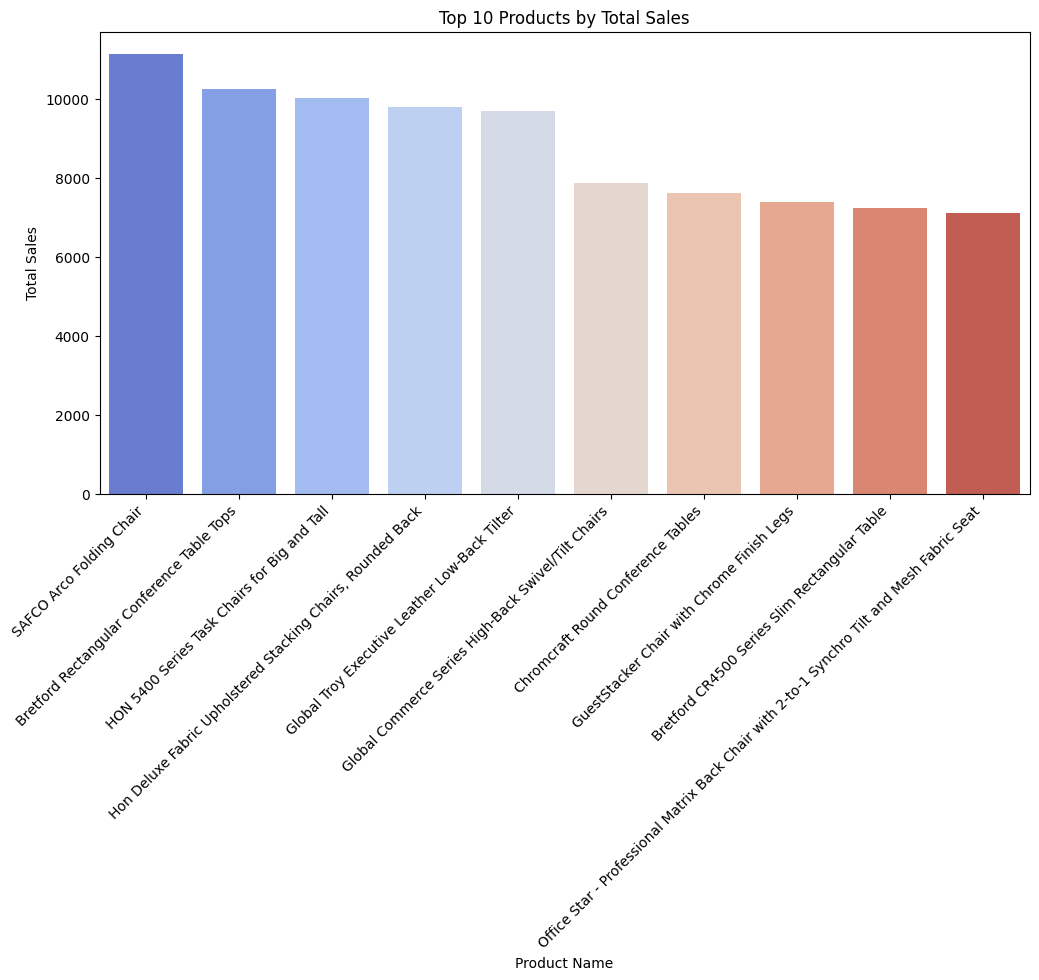

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort products by total sales
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.index, y=top_products.values, palette='coolwarm')
plt.title('Top 10 Products by Total Sales')
plt.xlabel('Product Name')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.show()


**Insights**

  - The SAFCO Arco Folding Chair has the highest total sales, making it the top-performing product.
  - Several conference tables and office chairs dominate the top 10, indicating a high demand for office furniture.
  - The sales gap between the top products suggests varying levels of customer preference and purchasing trends.

## Total Sales by Sub-Category

This bar chart represents the total sales for different sub-categories in the dataset. Analyzing sales at the sub-category level helps businesses identify top-performing product groups and allocate resources efficiently.


<ipython-input-33-e4a79a306487>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sub-Category', y='Sales', data=database, palette='coolwarm', estimator=sum)


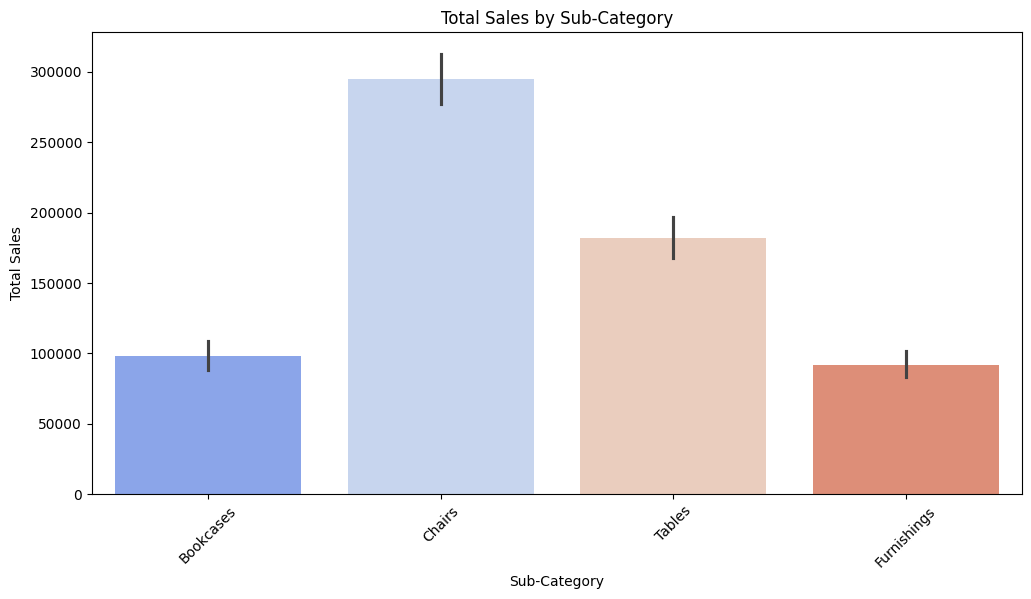

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Sub-Category', y='Sales', data=df, palette='coolwarm', estimator=sum)
plt.title('Total Sales by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


**Insights**

  - Chairs generate the highest sales, indicating a high demand for office seating.
  - Tables and bookcases also contribute significantly to total sales.
  - Furnishings have relatively lower sales, suggesting potential marketing or inventory adjustments.

## Monthly Sales Trend by Sub-Category

This line chart visualizes **monthly sale**s trends for different sub-categories over time. Analyzing these trends helps businesses understand **seasonal patterns, sales fluctuations, and growth opportunities**.

<ipython-input-34-ccf046d53ff8>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sales_trend = database.groupby([pd.Grouper(key='Order Date', freq='M'), 'Sub-Category'])['Sales'].sum().reset_index()


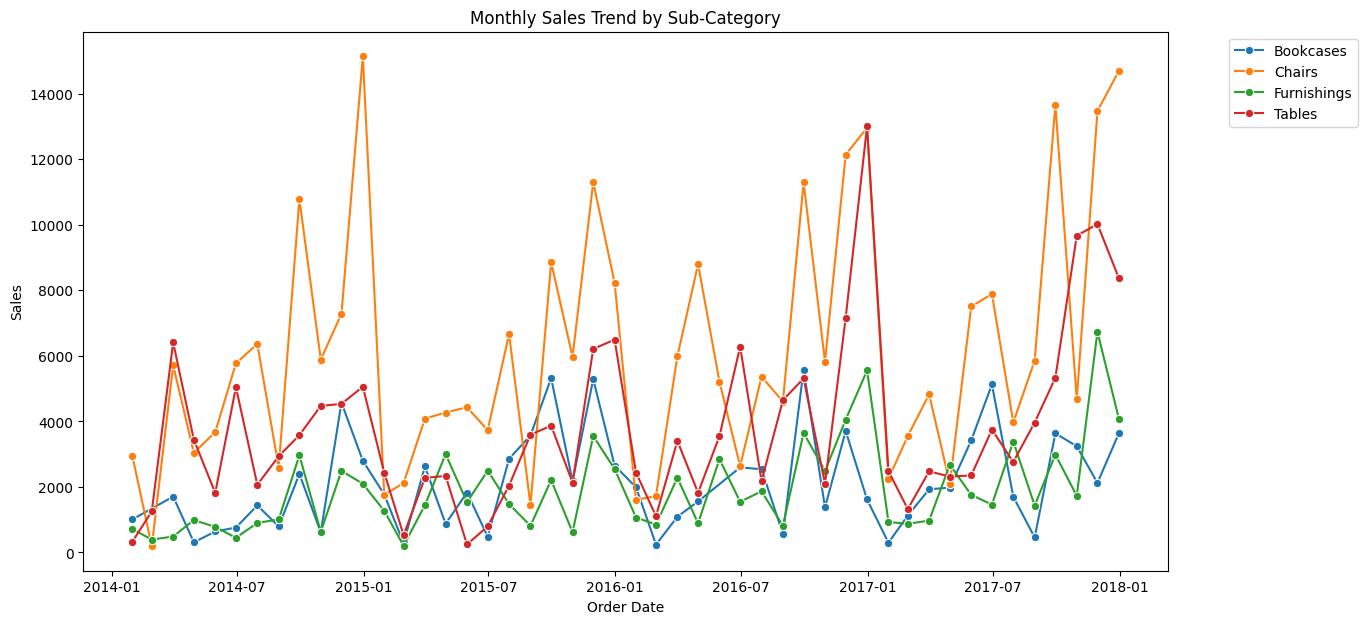

In [ ]:
# Convert 'Order Date' to datetime if not already
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Group by month and sub-category
sales_trend = df.groupby([pd.Grouper(key='Order Date', freq='M'), 'Sub-Category'])['Sales'].sum().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(data=sales_trend, x='Order Date', y='Sales', hue='Sub-Category', marker='o')
plt.title('Monthly Sales Trend by Sub-Category')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

 **Insights**

- Seasonal fluctuations: Some sub-categories exhibit periodic spikes, indicating seasonal demand.
- Chairs and tables show the most volatile trends, with sharp peaks in sales.
- Bookcases and furnishings have more stable trends, with steady but smaller increases over time.
- Sales growth over time: An overall upward trend suggests an increase in demand for certain sub-categories.

## Sales Heatmap by Sub-Category and Month

This heatmap provides a visual representation of monthly sales trends across **different sub-categories**. The **color intensity** represents the sales volume, with darker shades indicating **higher sales** and lighter shades representing **lower sales.**



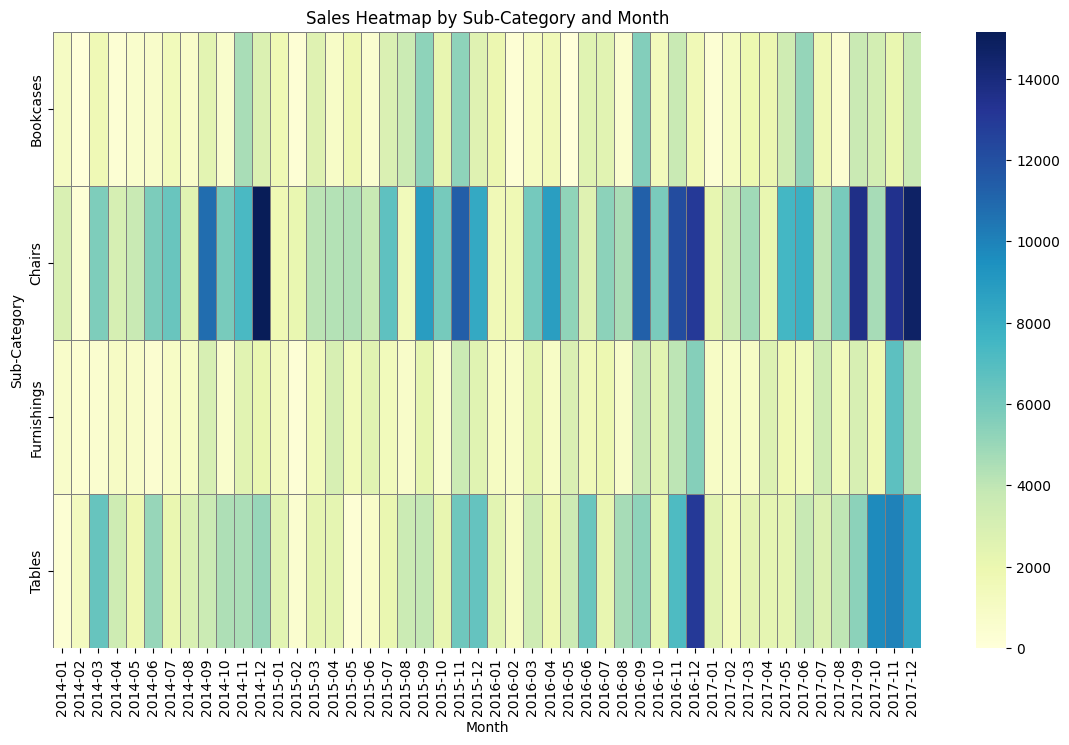

In [ ]:
# Create a pivot table
sales_pivot = df.pivot_table(values='Sales', index='Sub-Category', columns=df['Order Date'].dt.to_period('M'), aggfunc='sum').fillna(0)

plt.figure(figsize=(14, 8))
sns.heatmap(sales_pivot, cmap='YlGnBu', linewidths=0.5, linecolor='gray')
plt.title('Sales Heatmap by Sub-Category and Month')
plt.xlabel('Month')
plt.ylabel('Sub-Category')
plt.show()

**Insights**

  - Sales peaks (darker shades) indicate high-demand months for each sub-category.
  - Chairs and Tables experience periodic spikes in sales, suggesting seasonal demand.
  - Furnishings and Bookcases have relatively lower sales fluctuations.
  - Cyclic trends can be observed, which may help in forecasting future sales.


## Sales vs Profit by Sub-Category

This scatter plot visualizes the relationship between sales and **profit** across different **sub-categories**. The goal is to identify patterns

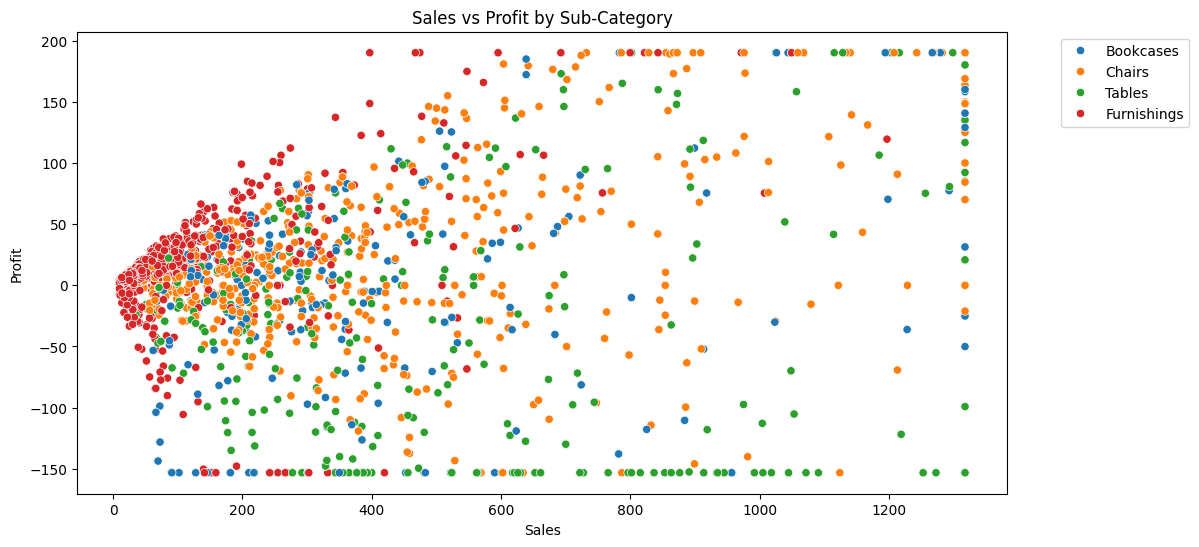

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Sales', y='Profit', hue='Sub-Category', palette='tab10')
plt.title('Sales vs Profit by Sub-Category')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Insights**

1. Profitable vs. Unprofitable Sales:
  - Some transactions have high sales but negative profit, suggesting discounting, high costs, or returns.
  - Certain sub-categories (e.g., Tables) exhibit many points near or below zero profit, indicating potential low-margin products.

2. Profitability Trends:

  - Furnishings (red points) cluster densely around positive profit, showing consistent profitability.
  - Chairs (orange points) exhibit a wide spread, with both high-profit and negative-profit transactions, indicating variability in pricing or costs.

3. Outliers & High Sales Transactions:

  - Some transactions have very high sales values but widely varying profit margins.
  - High-sales, high-profit points suggest high-margin products that should be prioritized.


## Hypothesis testing
### **For all features affect on sales**

In [ ]:
region1 = "East"
region2 = "West"
region3 = "South"
region4 = "Central"


sales_region1 = df[df["Region"] == region1]["Sales"]
sales_region2 = df[df["Region"] == region2]["Sales"]
sales_region3 = df[df["Region"] == region3]["Sales"]
sales_region4 = df[df["Region"] == region4]["Sales"]

f_stat, p_value = stats.f_oneway(sales_region1, sales_region2, sales_region3, sales_region4)

print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in sales between the regions.")
else:
    print("Fail to reject the null hypothesis: No significant difference in sales between the regions.")


F-statistic: 0.4761
P-value: 0.6989
Fail to reject the null hypothesis: No significant difference in sales between the regions.


In [ ]:
corr, p_value = stats.pearsonr(df["Discount"], df["Sales"])


print(f"Pearson Correlation Coefficient: {corr:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant correlation between discount and sales.")
else:
    print("Fail to reject the null hypothesis: No significant correlation between discount and sales.")

Pearson Correlation Coefficient: -0.0207
P-value: 0.3410
Fail to reject the null hypothesis: No significant correlation between discount and sales.


In [ ]:
df["Order Date"] = pd.to_datetime(df["Order Date"])


split_date = "2016-01-01"

sales_before = df[df["Order Date"] < split_date]["Sales"]
sales_after = df[df["Order Date"] >= split_date]["Sales"]

min_length = min(len(sales_before), len(sales_after))
sales_before = sales_before[:min_length]
sales_after = sales_after[:min_length]

t_stat, p_value = stats.ttest_rel(sales_before, sales_after)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in sales after 2016.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in sales after 2016.")

T-statistic: 1.6771
P-value: 0.0939
Fail to reject the null hypothesis: There is no significant difference in sales after 2016.


In [ ]:
consumer_sales = df[df["Segment"] == "Consumer"]["Sales"]
corporate_sales = df[df["Segment"] == "Corporate"]["Sales"]
home_office_sales = df[df["Segment"] == "Home Office"]["Sales"]

f_stat, p_value = stats.f_oneway(consumer_sales, corporate_sales, home_office_sales)

print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject the null hypothesis: At least one segment has significantly different sales.")
else:
    print("Fail to reject the null hypothesis: No significant difference in sales among segments.")

F-statistic: 0.5937
P-value: 0.5524
Fail to reject the null hypothesis: No significant difference in sales among segments.


In [ ]:
cities = df['City'].unique()


sales_data = [df[df["City"] == city]["Sales"] for city in cities]

f_stat, p_value = stats.f_oneway(*sales_data)

print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in sales between cities.")
else:
    print("Fail to reject the null hypothesis: No significant difference in sales between cities.")

F-statistic: 1.0551
P-value: 0.2471
Fail to reject the null hypothesis: No significant difference in sales between cities.


In [ ]:
ship_mode1 = "Standard Class"
ship_mode2 = "Second Class"
ship_mode3 = "First Class"
ship_mode4 = "Same Day"

sales_mode1 = df[df["Ship Mode"] == ship_mode1]["Sales"]
sales_mode2 = df[df["Ship Mode"] == ship_mode2]["Sales"]
sales_mode3 = df[df["Ship Mode"] == ship_mode3]["Sales"]
sales_mode4 = df[df["Ship Mode"] == ship_mode4]["Sales"]

t_stat, p_value = stats.ttest_ind(sales_mode1, sales_mode2, equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print(f"Reject the null hypothesis: There is a significant difference in sales between {ship_mode1} and {ship_mode2}.")
else:
    print(f"Fail to reject the null hypothesis: No significant difference in sales between {ship_mode1} and {ship_mode2}.")

T-statistic: 0.0289
P-value: 0.9769
Fail to reject the null hypothesis: No significant difference in sales between Standard Class and Second Class.


In [ ]:
states = df['State'].unique()


sales_data = [df[df["State"] == state]["Sales"] for state in states]

f_stat, p_value = stats.f_oneway(*sales_data)

print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in sales between states.")
else:
    print("Fail to reject the null hypothesis: No significant difference in sales between states.")

F-statistic: 1.7940
P-value: 0.0008
Reject the null hypothesis: There is a significant difference in sales between states.
